In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

In [16]:
dataset = pd.read_csv('../../Phase1/DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Splitting the training data, one set will be used for training the emperical models and the other set will be used for KBNN

x_emp, x_kbnn, y_emp, y_kbnn = train_test_split(x_train, y_train, test_size = 0.8, random_state = 123)   


In [17]:
from sklearn.neighbors import KNeighborsRegressor

emp = KNeighborsRegressor(n_neighbors=5)
 
emp.fit(x_train, y_train)

KNeighborsRegressor()

In [18]:
# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [19]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_kbnn, y_kbnn-emp.predict(x_kbnn), batch_size = 10, epochs = 100, validation_data = (x_test, y_test-emp.predict(x_test)))

Epoch 1/100
3311/3311 [==============================] - 2s 589us/step - loss: 1.7347 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 2/100
3311/3311 [==============================] - 2s 614us/step - loss: 0.1439 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 3/100
3311/3311 [==============================] - 2s 611us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 4/100
3311/3311 [==============================] - 2s 569us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5/100
3311/3311 [==============================] - 2s 567us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 6/100
3311/3311 [==============================] - 2s 596us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 7/100
3311/3311 [==============================] - 2s 536us/step

3311/3311 [==============================] - 2s 566us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 54/100
3311/3311 [==============================] - 2s 591us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 55/100
3311/3311 [==============================] - 2s 568us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 56/100
3311/3311 [==============================] - 2s 566us/step - loss: 0.1439 - accuracy: 0.0000e+00 - val_loss: 0.3351 - val_accuracy: 0.0000e+00
Epoch 57/100
3311/3311 [==============================] - 2s 688us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 58/100
3311/3311 [==============================] - 2s 645us/step - loss: 0.1440 - accuracy: 0.0000e+00 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 59/100
3311/3311 [==============================] - 2s 563us/step - los

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)[0] + emp.predict(x_test)

mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

print(mean_squared_error(y_test,y_pred))

0.33505954197059457


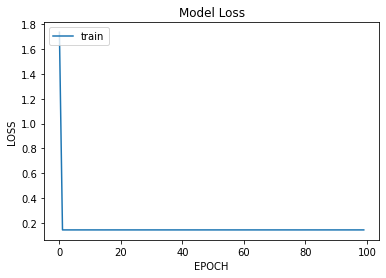

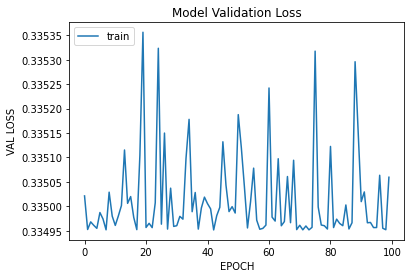

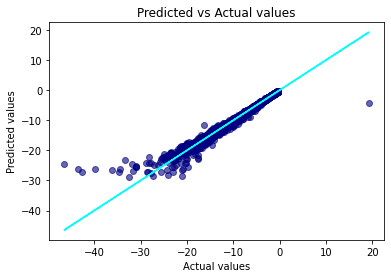

In [21]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)